In [38]:
import mysql.connector as sql
import pandas as pd

mydb = sql.connect (
    host = "localhost",
    user = "root",
    password = "ZAQs8271911c$",
    auth_plugin='mysql_native_password',
    buffered = True,          # using this for reading table, panda dont need it
    #multi=True,                 # if wanna use mulitple query
    database = "sql_fr_ai"
)

# auth_plugin is needed, can check by commends 
# SELECT user,authentication_string,plugin,host FROM mysql.user;
# check the columns plugin and user


#? only execute sql query wo passing data to panda dataframe
# mycoursor = mydb.cursor()
# mycoursor.execute(
#     """
#     #! create database
#     create database if not exists database_name;
#     """
# )


#? execute sql query  AND  passing data to panda dataframe
# edit sql query here
sql_query = """
select * 
from  daily_amount;
"""
# run sql queries and Importing data from a MySQL database 
# into Pandas data frame

df = pd.read_sql_query(
    sql_query,
    mydb)


df


,date_ymd,amount_day
0,2016-04-05,74950.0
1,2016-04-06,145550.0
2,2016-04-07,95900.0
3,2016-04-08,160400.0
4,2016-04-09,170550.0
...,...,...
360,2016-12-12,69400.0
361,2016-12-13,65400.0
362,2016-12-14,56300.0
363,2016-12-15,61500.0


# Key differences between Table and View

* A table is a database object that holds information used in applications and reports. On the other hand, a view is also a database object utilized as a table and can also link to other tables.

* A table consists of rows and columns to store and organized data in a structured format, while the view is a result set of SQL statements.

* A table is structured with columns and rows, while a view is a virtual table extracted from a database.

* The table is an independent data object while views are usually depending on the table.

* The table is an actual or real table that exists in physical locations. On the other hand, views are the virtual or logical table that does not exist in any physical location.

* A table allows to performs add, update or delete operations on the stored data. On the other hand, we cannot perform add, update, or delete operations on any data from a view. If we want to make any changes in a view, we need to update the data in the source tables.

* We cannot replace the table object directly because it is stored as a physical entry. In contrast, we can easily use the replace option to recreate the view because it is a pseudo name to the SQL statement running behind on the database server.


# Syntax
```
CREATE  OR ALTER  VIEW  schema_name.view_name
WITH <view_attribute>
AS select_statement   
[WITH CHECK OPTION]
```

# reasons for using views
#### It is a view and does not have a definition or structure of a table. Its definition and structure is simply a query that, under the hood, can access many tables or a part of a table.

#### Views can be used for a few reasons. Some of the main reasons are as follows:

* To simplify database structure to the individuals using it
* As a security mechanism to DBAs for allowing users to access data without granting them permissions to directly access the underlying base tables
* To provide backward compatibility to applications that are using our database

In [28]:

#!  cant use same name as table!!!!
#! Within a database, base tables and views share the same namespace, 
#! so a base table and a view cannot have the same name.

#! cant use 
#! create view if not exists
#? but we can use  CREATE OR REPLACE VIEW
mycoursor = mydb.cursor()
mycoursor.execute(
#? create view daily_amount2
"""
CREATE OR REPLACE VIEW  daily_amount2 AS
SELECT 
	order_report.date_ymd,
    sum( order_report.amount ) AS amount_day
FROM(  -- UNION ALL 2 TABLES AS order_report_1 and 2
	SELECT *
    FROM order_report_1
    UNION ALL
		SELECT *
        FROM order_report_2
) AS order_report
GROUP BY order_report.date_ymd
;   
"""
)

	

In [22]:
# DROP VIEW view_table_name;

mycoursor = mydb.cursor()
mycoursor.execute(
"""
DROP VIEW daily_amount2
;   
"""
)

	

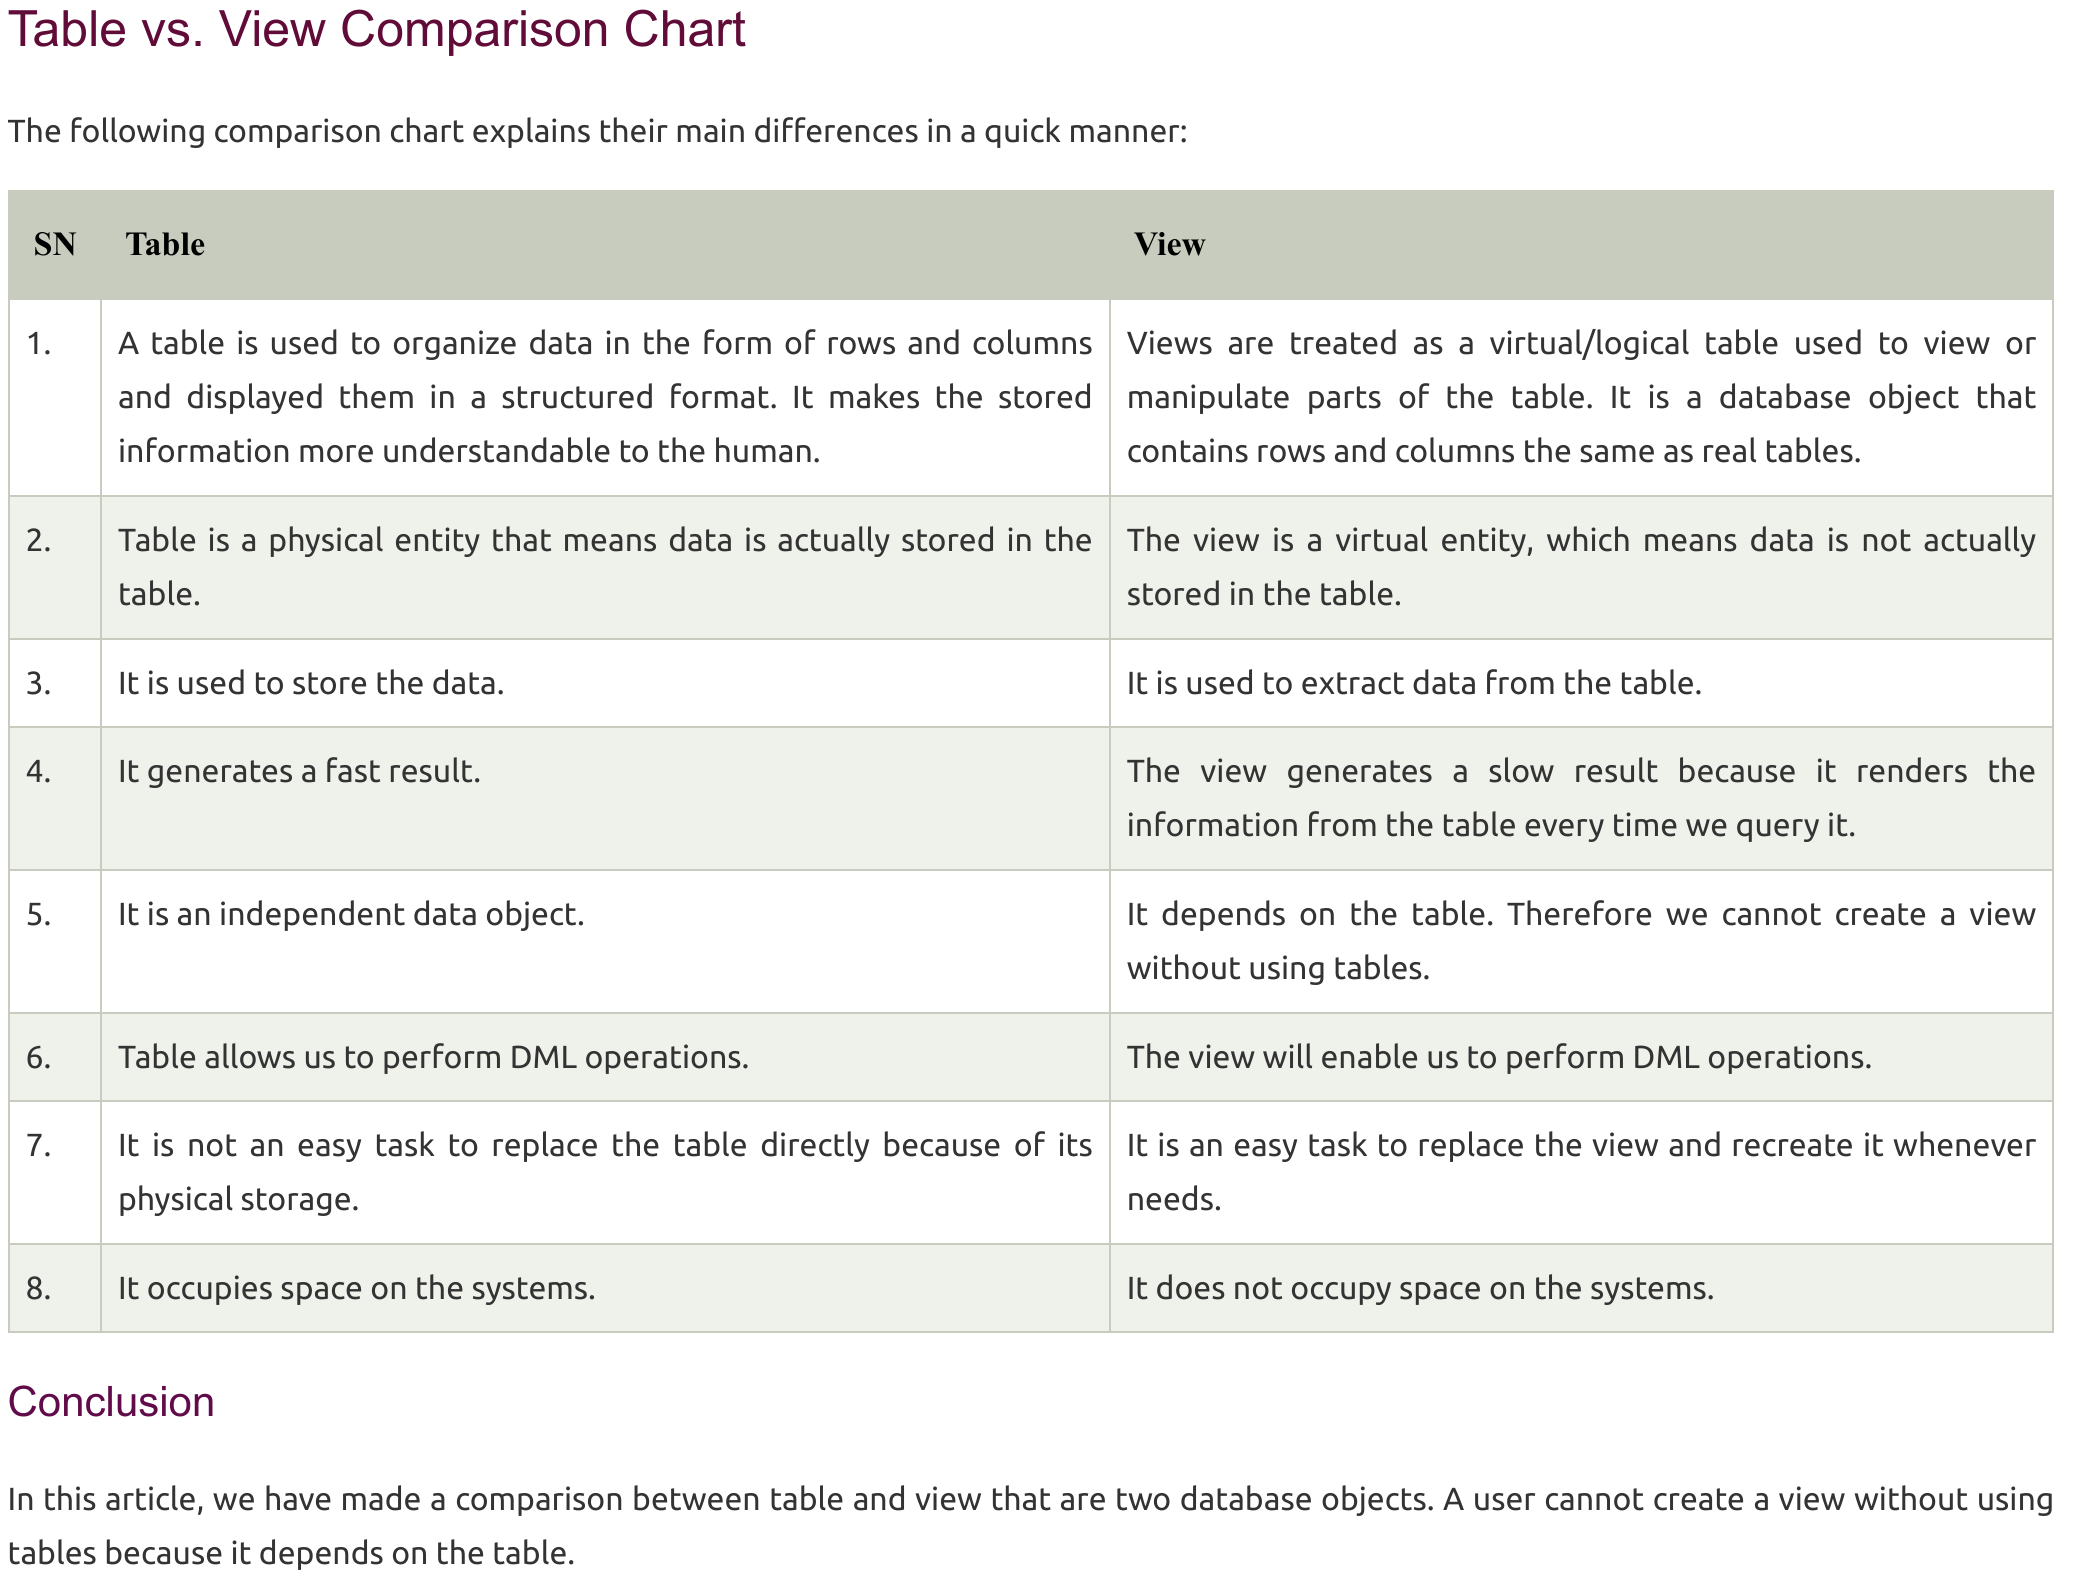

In [13]:
from IPython.display import Image
Image("/home/bruce/Pictures/Screenshots/view_and_table_comparison.png")

In [37]:
# edit sql query here
sql_query = """
SELECT *
FROM daily_amount
LEFT JOIN weather
ON (date_ymd)
"""
# run sql queries and Importing data from a MySQL database 
# into Pandas data frame

df = pd.read_sql_query(
    sql_query,
    mydb)

# table daily_amount
# date_ymd	amount_day

# table weather
# date_ymd	weekday	avetemp	totprecip



df

/home/bruce/.local/lib/python3.10/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


DatabaseError: Execution failed on sql '
SELECT *
FROM daily_amount
LEFT JOIN weather
ON (date_ymd)
': 1052 (23000): Column 'date_ymd' in on clause is ambiguous